In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
#loading dataset
df1=pd.read_csv("dataset1.csv")
df2=pd.read_csv("dataset2.csv")

In [3]:
print(f"Length of dataset one is {len(df1)}")
print(f"Length of dataset two is {len(df2)}")

Length of dataset one is 907
Length of dataset two is 2123


## Initial data exploration

In [4]:
#dealing with df1 first
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [5]:
df1.dtypes

start_time                    object
bat_landing_to_food          float64
habit                         object
rat_period_start              object
rat_period_end                object
seconds_after_rat_arrival      int64
risk                           int64
reward                         int64
month                          int64
sunset_time                   object
hours_after_sunset           float64
season                         int64
dtype: object

In [6]:
#checking for null values
df1.isnull().sum()

start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64

In [7]:
#as we can see there are some values that are terribly encoded under the habit column
#Thus we will identify columns with similar problems and fix them in the data cleaner function
df1["habit"].value_counts().to_frame()

,count
habit,
fast,245
rat,221
pick,139
bat,30
bat_fight,26
...,...
eating_and_bat_and_pick,1
bat_figiht,1
"415.0,86.5,559.2,140.2; 66.0,157.0,285.0,279.0",1


In [8]:
cat_columns=['start_time', 'habit', 'rat_period_start', 'rat_period_end', 'risk',
       'reward', 'month', 'sunset_time', 'season', 'start_date']

After going through the cat columns, only habit has terribly encoded data

In [9]:
#creating a list for habit and manually identifying terrible words
df1["habit"].unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', nan,
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat',
       '94.0,305.0,239.0,416.0; 364.8,139.3,462.3,241.3', 'rat attack',
       'attack_rat', 'bat_and_rat', 'rat_attack', 'other_bats',
       'rat_pick', 'rat_and_bat', 'bowl_out', 'other_bat',
       '373.0,80.0,504.0,148.0; 274.6,110.7,382.4,267.3', 'other',
       '245.6,179.5,321.4,314.0; 522.4,0.3,592.0,95.5', 'eating',
       'rat_to_bat', 'other_bats/rat',
       '405.6,112.3,513.1,215.4; 464.1,197.7,614.9,334.3; 511.5,301.1,639.4,388.9',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3',
       '44.0,77.0,157.0,240.0; 253.0,96.0,346.0,147.0',
       '397.7,159.7,580.2,330.5; 252.0,92.0,346.0,149.0', 'pick_and_bat',
       '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,155.0',
       '423.0,155.9,535.6,370.9; 238.0,99.0,314.0,160.0',
       'eating_and

In [10]:
wrong_encoded=0
for n in df1["habit"]:
    try: 
        if type(int(n[0]))==int:
            wrong_encoded+=1
    except:
        pass
count=len(df1["habit"])        
print(f"The total number of terribly encoded {wrong_encoded}, out of {count}")        

    

The total number of terribly encoded 17, out of 907


In [11]:
#function to change datatypes and clean data
def df1_data_cleaner(df):
    #the function will convert risk, reward, month and season to respective categories
    #it will then move to extract the time from start_time, rat_period_start, rat_period_end and sunset_time
    #next it will create a column called start date which will be the dates in start time,then start time will just have the time 
    #The next step is to remove all terribly encoded data 
    #Then remov null values from habit, considering they are a small number of null values, we can discard them 
    
    
    df["risk"]=df["risk"].astype(str)
    df["reward"]=df["reward"].astype(str)
    df["month"]=df["month"].astype(str)
    df["season"]=df["season"].astype(str)

    df["rat_period_start"]=df["rat_period_start"].apply(lambda x: x.split(" ")[1])
    df["rat_period_end"]=df["rat_period_end"].apply(lambda x: x.split(" ")[1])
    df["start_date"]=df["start_time"].apply(lambda x: x.split(" ")[0])
    df["start_time"]=df["start_time"].apply(lambda x: x.split(" ")[1])
    df["sunset_time"]=df["sunset_time"].apply(lambda x: x.split(" ")[1])

    bad_data_index_list=[]
    for n in df["habit"]:
        try: 
            if type(int(n[0]))==int:
                index_value=df.loc[df["habit"]==n].index.values[0]
                bad_data_index_list.append(index_value)
        except:
            pass
           
    df.drop(index=bad_data_index_list,inplace=True)
    df.dropna(inplace=True)
    return df
    
df1_cleaned=df1_data_cleaner(df1).copy()    
    
    

In [12]:
df1_cleaned.isnull().sum()

start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
start_date                   0
dtype: int64

In [13]:
df1_cleaned["habit"].unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food',
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat', 'rat attack', 'attack_rat', 'bat_and_rat',
       'rat_attack', 'other_bats', 'rat_pick', 'rat_and_bat', 'bowl_out',
       'other_bat', 'other', 'eating', 'rat_to_bat', 'other_bats/rat',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       'pick_and_bat', 'eating_and_bat_and_pick', 'bat_figiht',
       'bat_pick_rat', 'rat_pick_and_bat', 'pick_and_rat', 'fight_rat',
       'all_pick', 'no_food', 'bats', 'others', 'rat_and_pick',
       'pick_rat_bat', 'bat_and_pick_far', 'fast_far', 'fight',
       'bat_rat_pick', 'bat_pick', 'rat_disappear', 'eating_bat_rat_pick',
       'fast_and_pick', 'other directions', 'bat_fight_rat', 'bat_rat',
       'pup_and_mon', 'pick_eating_all', 'pick_bat_rat', 'rat_bat',
       'rat_bat_fight', 'eating_bat_pick', 'pick_rat_and_bat',
       'fight_bat', 'bat_fight_and_rat', 'rat_and

## Numerical data cleaning

In [14]:
#selecting numerical data
df1_cleaned.select_dtypes(["int","float"]).columns

Index(['bat_landing_to_food', 'seconds_after_rat_arrival',
       'hours_after_sunset'],
      dtype='object')

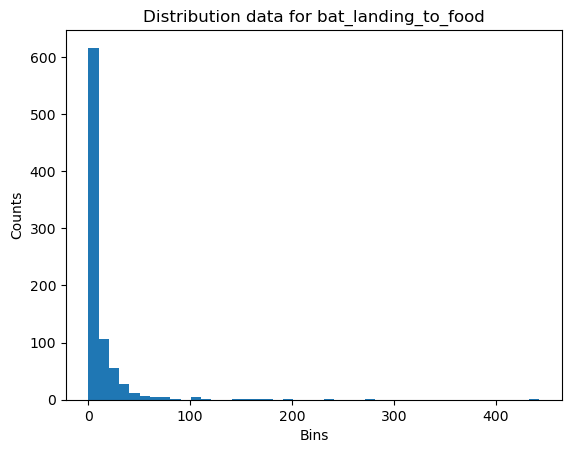

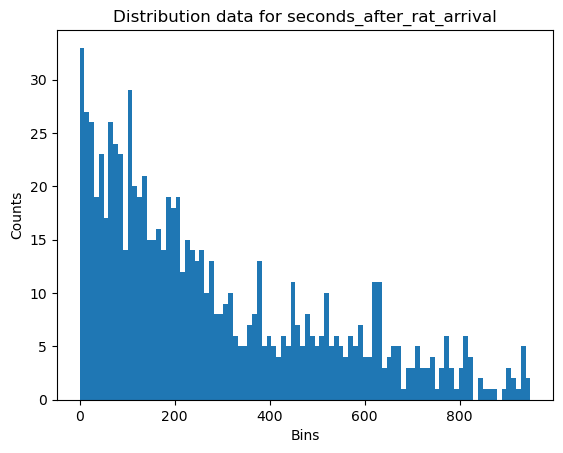

In [19]:
for n in df1_cleaned.select_dtypes(["int","float"]).columns[0:2]:
    range=df1_cleaned[n].max() - df1_cleaned[n].min()
    bin_width=10
    bins=int(range/bin_width)
    plt.hist(df1_cleaned[n],bins=bins)
    plt.title(f"Distribution data for {n}")
    plt.xlabel("Bins")
    plt.ylabel("Counts")
    plt.show()

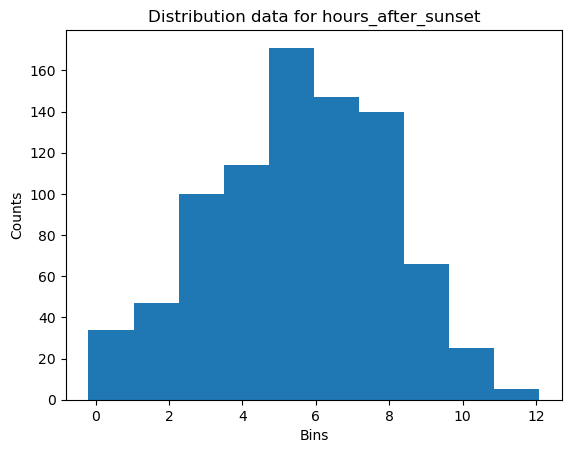

In [20]:
#histogram for hours after sunset
plt.hist(df1_cleaned["hours_after_sunset"])
plt.title("Distribution data for hours_after_sunset")
plt.xlabel("Bins")
plt.ylabel("Counts")
plt.show()

bat_landing_to_food and seconds_after_rat_arrival are rightly skewed, hence they have some extreme positive values that deviate from the normal distribution. Next, I will visual using a boxplot and get a total estimate of how many outliers are in the two columns

The last column, hours after sunset is normally distributed.

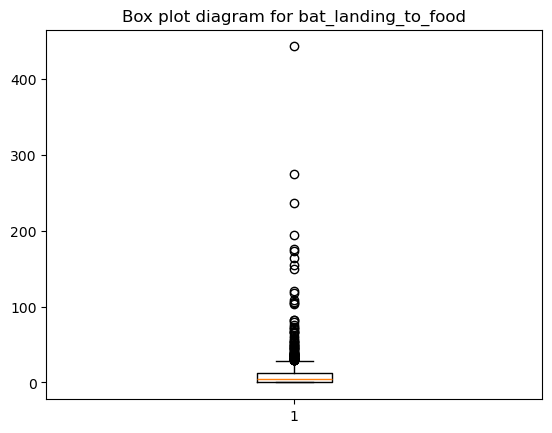

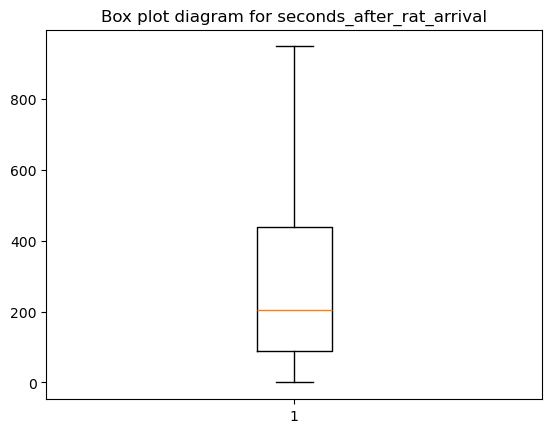

In [24]:
for n in df1_cleaned.select_dtypes(["int","float"]).columns[0:2]:
    plt.boxplot(df1_cleaned[n])
    plt.title(f"Box plot diagram for {n}")
    plt.show()

In [35]:
#using IQR to get the percentage of outliers in the first column
def IQR(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    IQR=q3 - q1
    lower_bound=q1 - IQR*1.5
    upper_bound=q3 + IQR*1.5
    outlier_df=df.loc[(df[column_name]<lower_bound) | (df[column_name]>upper_bound)]
    outlier_count=len(outlier_df)
    outlier_percentage_count=(outlier_count/len(df))*100
    print(f"The total number of outliers in bat_landing_to_food column is {outlier_count} which consists of {outlier_percentage_count} %") 
    #removing outliers
    cleaned_df=df.loc[(df[column_name]>=lower_bound) & (df[column_name]<=upper_bound)]
    return cleaned_df
df=IQR(df1_cleaned,'bat_landing_to_food').copy()
  
    

The total number of outliers in bat_landing_to_food column is 80 which consists of 9.422850412249705 %


In [38]:
df.columns

Index(['start_time', 'bat_landing_to_food', 'habit', 'rat_period_start',
       'rat_period_end', 'seconds_after_rat_arrival', 'risk', 'reward',
       'month', 'sunset_time', 'hours_after_sunset', 'season', 'start_date'],
      dtype='object')

## Feature engineering